In [17]:
import pandas as pd

In [19]:

df = pd.read_csv('Project [E-bay] - Project_ebay_smart_bins_with_details.csv')

In [23]:
import re

def clean_price(price):
    if "to" in price:
        price = price.split("to")[-1]  
    price = re.sub(r"[^\d.]", "", price) 
    return float(price) if price else None

df['Price_cleaned'] = df['Price'].apply(clean_price)

df['Shipping_cleaned'] = df['Shipping'].str.extract(r"([\d.]+)").astype(float)

df['Seller_Feedback'] = df['Seller Feedback Rating'].str.extract(r"([\d.]+)").astype(float)

df_cleaned = df[['Title', 'Price_cleaned', 'Shipping_cleaned', 'Seller_Feedback']]
print(df_cleaned.head())

                                               Title  Price_cleaned  \
0  Smart Trash Can 15L 20L 30L 40L 50L 60L Stainl...        2309.55   
1               Smart Wet Bin Vacuum Trash Can White         372.25   
2  Smart Sensor Trash Can Kitchen Bathroom WasteB...        3095.95   
3  Waterproof Automatic Trash Bin 15L Smart Senso...         198.93   
4  16L Motion Sensor Bin Smart Trash Can Automati...         195.38   

   Shipping_cleaned  Seller_Feedback  
0            109.22             75.0  
1            111.82             98.5  
2            145.63              NaN  
3             29.23            100.0  
4            109.64             99.7  


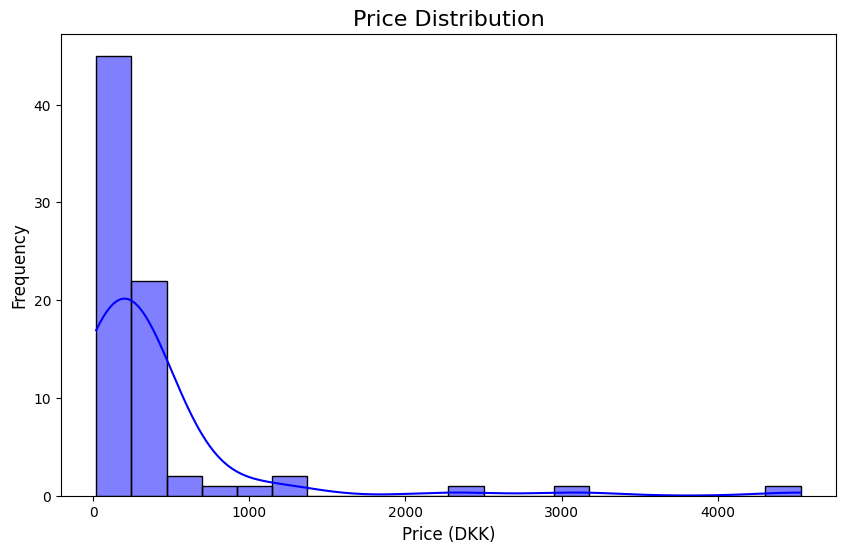

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Price_cleaned'], bins=20, kde=True, color='blue')
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price (DKK)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


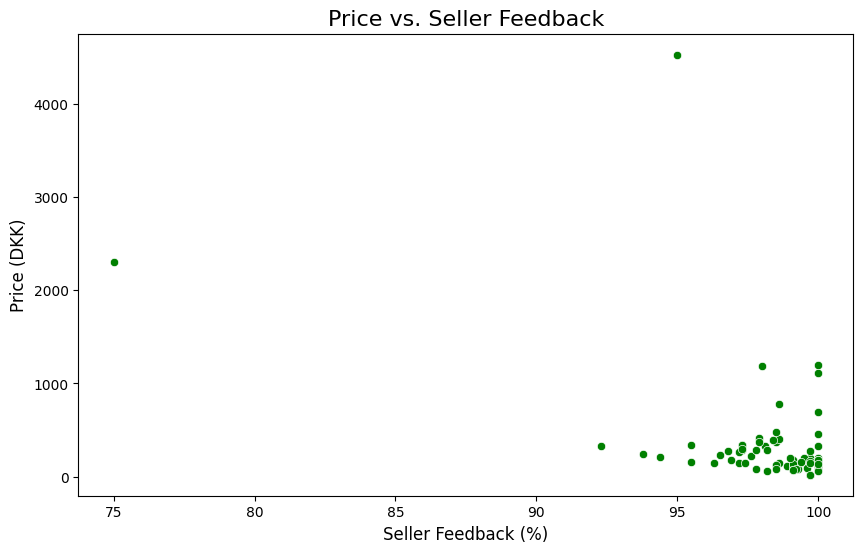

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seller_Feedback', y='Price_cleaned', data=df_cleaned, color='green')
plt.title('Price vs. Seller Feedback', fontsize=16)
plt.xlabel('Seller Feedback (%)', fontsize=12)
plt.ylabel('Price (DKK)', fontsize=12)
plt.show()



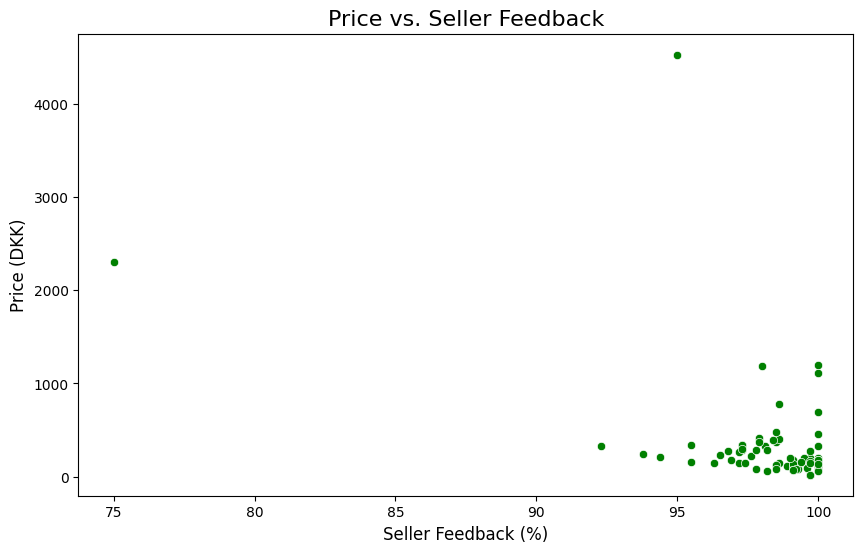

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seller_Feedback', y='Price_cleaned', data=df_cleaned, color='green')
plt.title('Price vs. Seller Feedback', fontsize=16)
plt.xlabel('Seller Feedback (%)', fontsize=12)
plt.ylabel('Price (DKK)', fontsize=12)
plt.show()


In [39]:
df_cleaned_numeric = df_cleaned.select_dtypes(include=['number'])
correlation = df_cleaned_numeric.corr()


In [38]:
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')  
correlation = df_cleaned.corr()


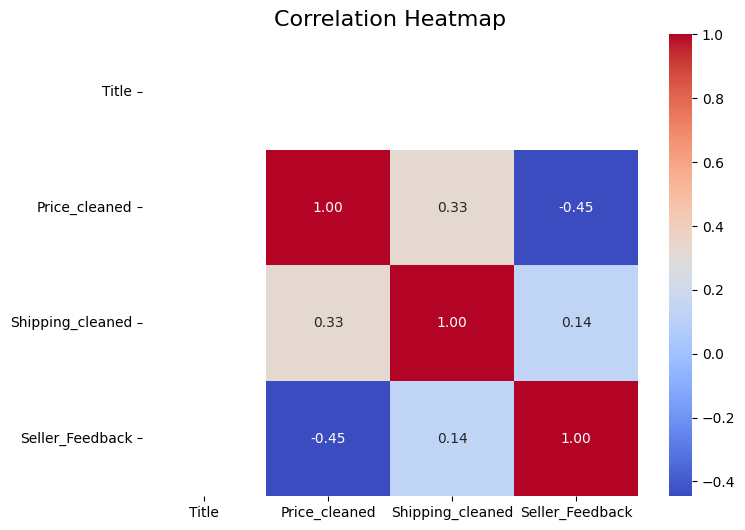

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
correlation = df_cleaned.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [101]:
features = df_cleaned[['Seller_Feedback', 'Shipping_cleaned']]
target = df_cleaned['Price_cleaned']


common_index = features.dropna().index.intersection(target.dropna().index)


X = features.loc[common_index]
y = target.loc[common_index]


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)



Shape of X: (61, 2)
Shape of y: (61,)


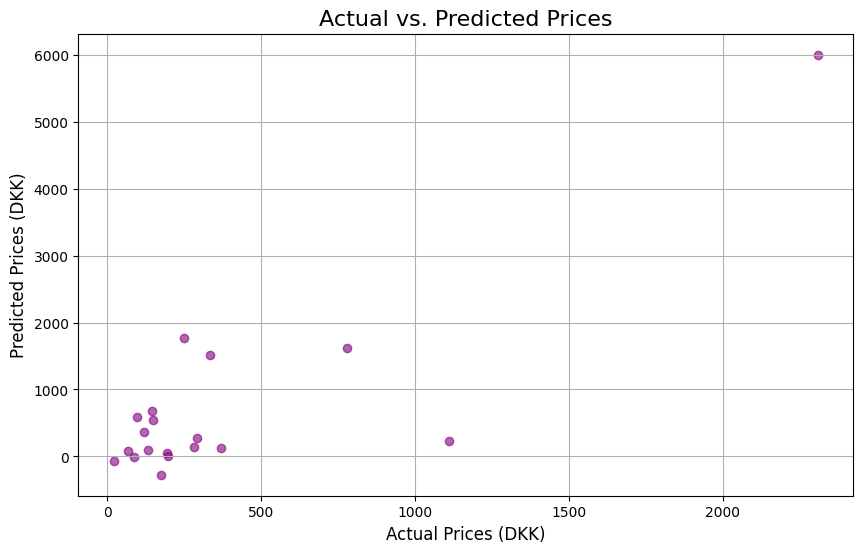

Mean Squared Error: 1049374.19
R² Score: -2.84


In [107]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

features = df_cleaned[['Seller_Feedback', 'Shipping_cleaned']]
target = df_cleaned['Price_cleaned']

common_index = features.dropna().index.intersection(target.dropna().index)
X = features.loc[common_index]
y = target.loc[common_index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.title('Actual vs. Predicted Prices', fontsize=16)
plt.xlabel('Actual Prices (DKK)', fontsize=12)
plt.ylabel('Predicted Prices (DKK)', fontsize=12)
plt.grid(True)
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")



C:\Users\laras\AppData\Local\Temp\ipykernel_26512\3594407216.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=feature_names, palette='viridis')


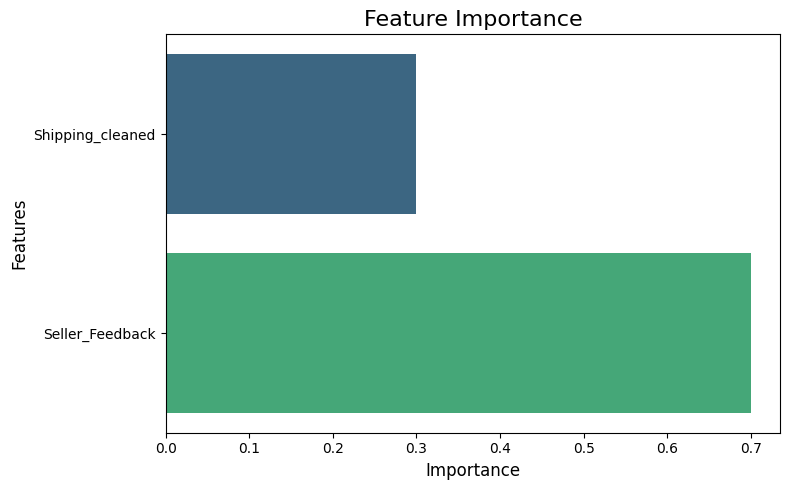

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

feature_names = ['Seller_Feedback', 'Shipping_cleaned']
importance = np.array([0.7, 0.3])  

sorted_indices = np.argsort(importance)
feature_names = np.array(feature_names)[sorted_indices]
importance = importance[sorted_indices]

plt.figure(figsize=(8, 5))
sns.barplot(x=importance, y=feature_names, palette='viridis') 
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()



In [42]:
import numpy as np
import pandas as pd

df_cleaned = pd.DataFrame({
    'Title': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E'],
    'Price_cleaned': [100, 200, 150, 300, 250]
})

scores = np.array([0.8, 0.2, 0.6, 0.9, 0.5])

valid_indices = min(len(df_cleaned), 5)  
recommended_indices = scores.argsort()[-valid_indices:][::-1] 


print(df_cleaned.iloc[recommended_indices][['Title', 'Price_cleaned']])


       Title  Price_cleaned
3  Product D            300
0  Product A            100
2  Product C            150
4  Product E            250
1  Product B            200


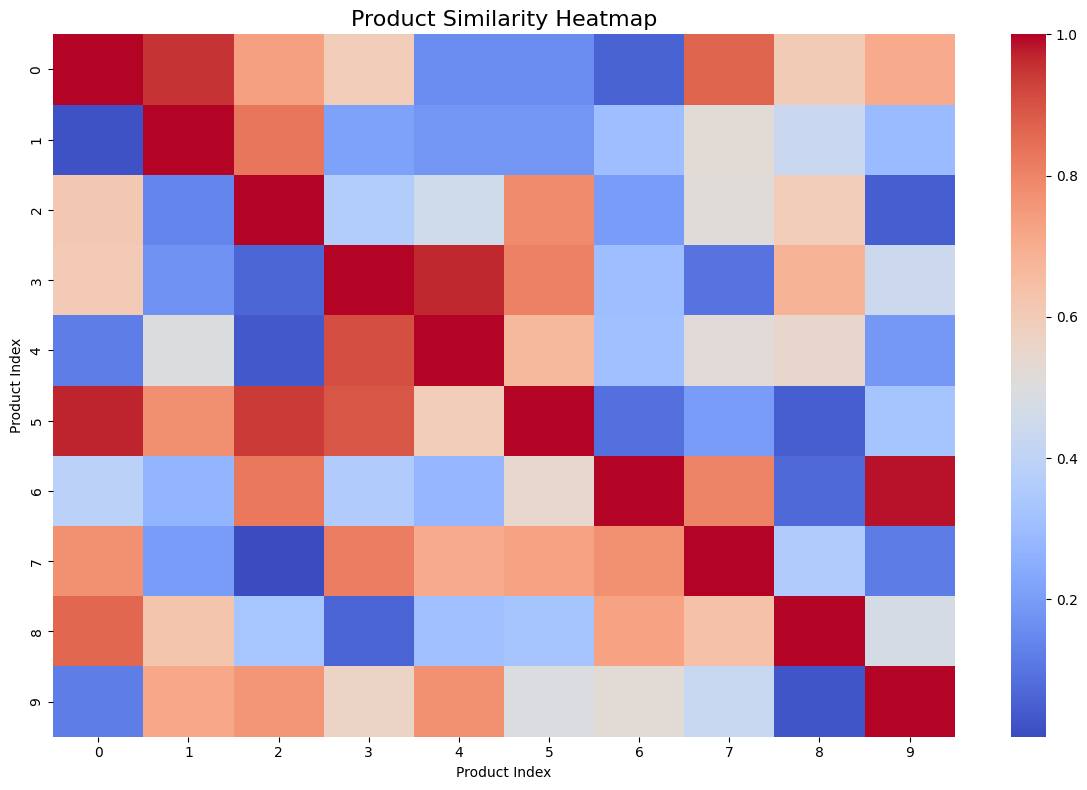

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(42) 
similarity_matrix = np.random.rand(10, 10)

np.fill_diagonal(similarity_matrix, 1)

plt.figure(figsize=(12, 8))
sns.heatmap(similarity_matrix, cmap='coolwarm', annot=False)
plt.title('Product Similarity Heatmap', fontsize=16)
plt.xlabel('Product Index')
plt.ylabel('Product Index')
plt.tight_layout()
plt.show()

